# **K - Nearest Neighbors**

### **Importing All Necessary Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns

### **Data Framing**

In [18]:
df = pd.read_csv('3dprinterdata.csv')
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [19]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe())

data shape: (50, 12)

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64 

       layer_height  wall_thickness  infill_density  nozzle_temperature  \
count     50.000000       50.000000        50.00000           50.000000   
mean       0.106000        5.220000        53.40000          221.500000   
std        0.064397        2.922747        25.36348           14.820353   
min        0.020000        1.000000        10.00000          200.000000   
25%        0.060000        3.000000        40.00000          210.000000   
50%        0.100000        5.000000        50.00000          220.000000   
75%        0.150000        7.000000        80.00000          230.000000   
max        0.200000       10.000000        90.00000          250.000000   


### **Histogram for Each Feature**

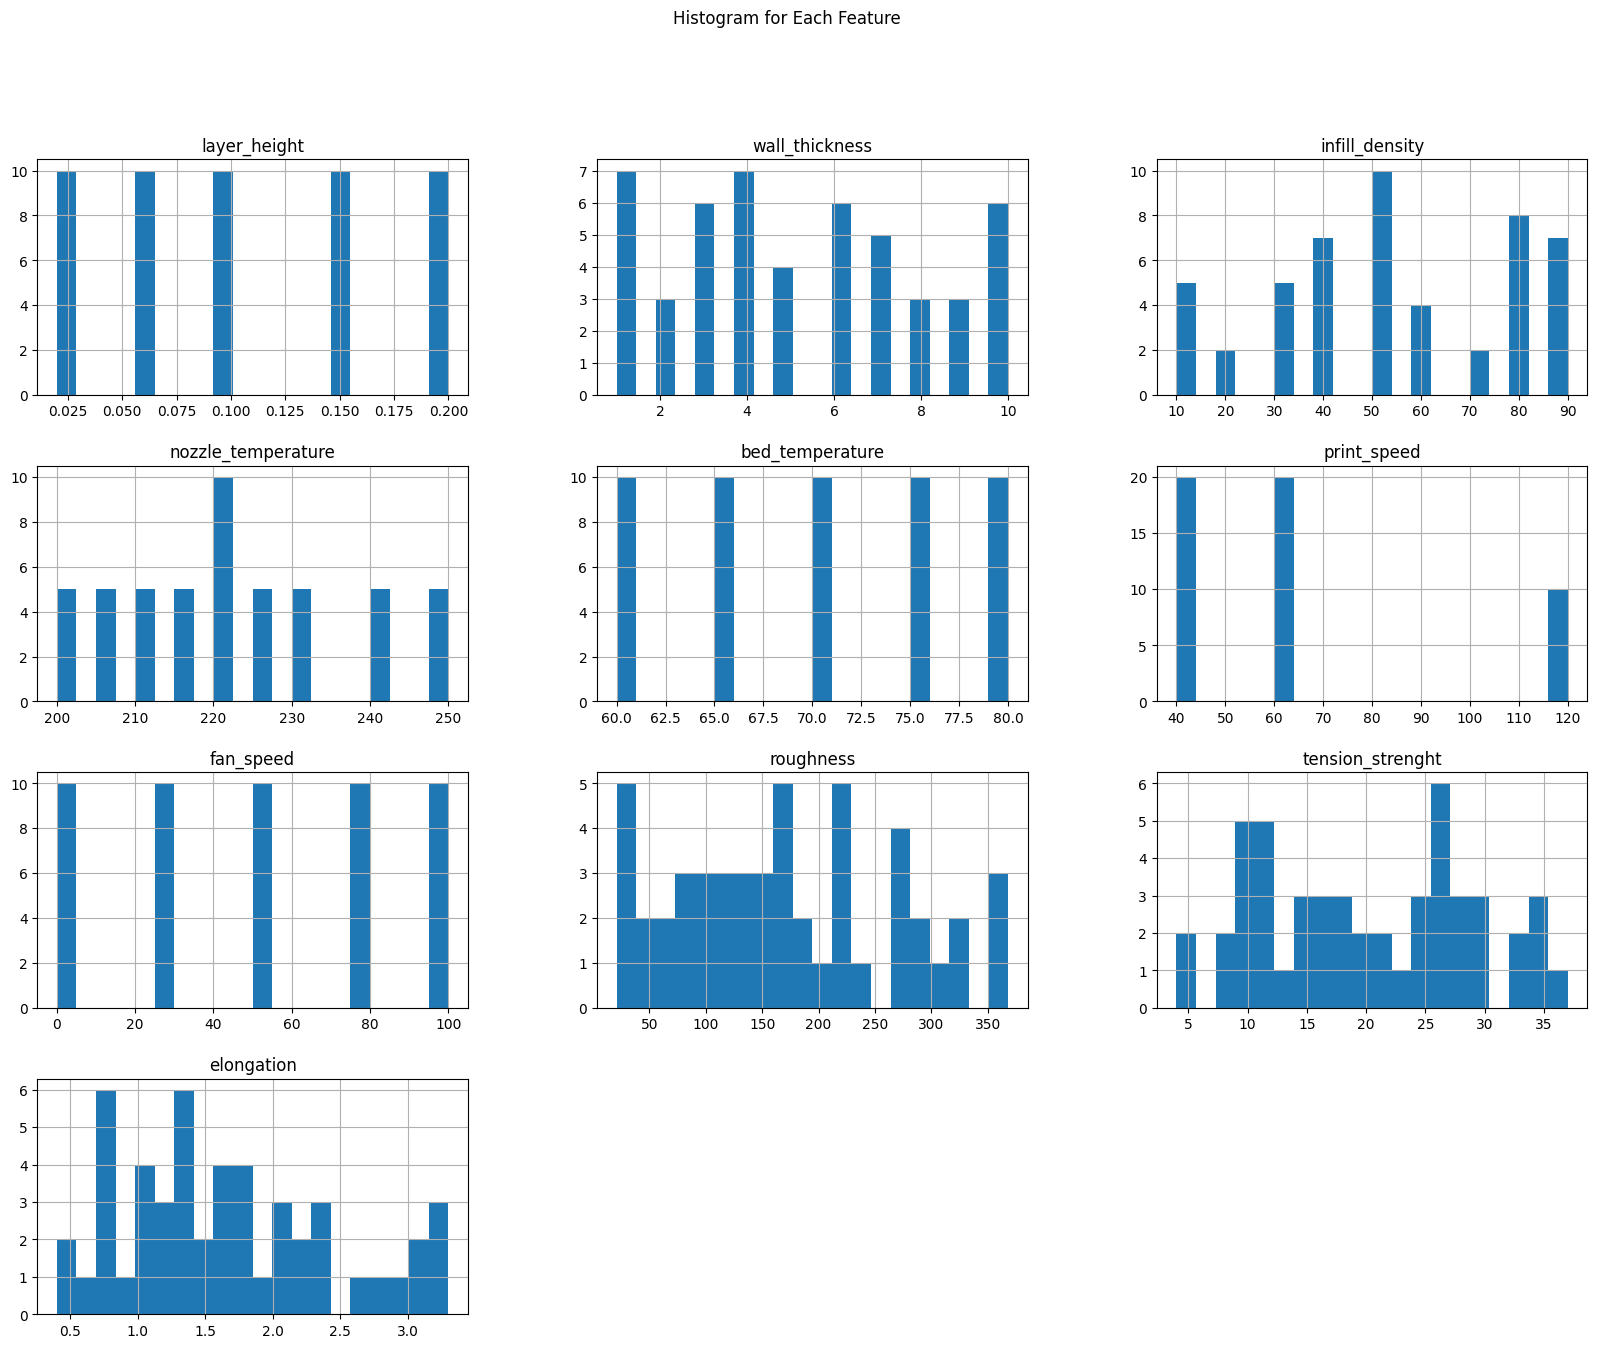

In [20]:
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogram for Each Feature')
plt.show()

### **Preprocessing**

Convert categorical variables to numerical

In [21]:
infill_pattern_encoder = LabelEncoder()
material_encoder = LabelEncoder()

df['infill_pattern'] = infill_pattern_encoder.fit_transform(df['infill_pattern'])
df['material'] = material_encoder.fit_transform(df['material'])
print(df.head(10))

   layer_height  wall_thickness  infill_density  infill_pattern  \
0          0.02               8              90               0   
1          0.02               7              90               1   
2          0.02               1              80               0   
3          0.02               4              70               1   
4          0.02               6              90               0   
5          0.02              10              40               1   
6          0.02               5              10               0   
7          0.02              10              10               1   
8          0.02               9              70               0   
9          0.02               8              40               1   

   nozzle_temperature  bed_temperature  print_speed  material  fan_speed  \
0                 220               60           40         0          0   
1                 225               65           40         0         25   
2                 230             

1. In this data set, "ABS" is assigned as 0 and "PLA" is assigned as 1 in materials column. 
2. In infill_pattern column, "grid" is assigned as 0 and "honeycomb" is assigned as 1.

### **Extract relevant columns**

In [22]:
X = df.drop('material', axis=1)
y = df['material']

### **Plot scatter plots for each pair of features**

C:\Users\Noor\AppData\Local\Temp\ipykernel_10072\1694538266.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Material', loc='upper right')  # Customize the legend


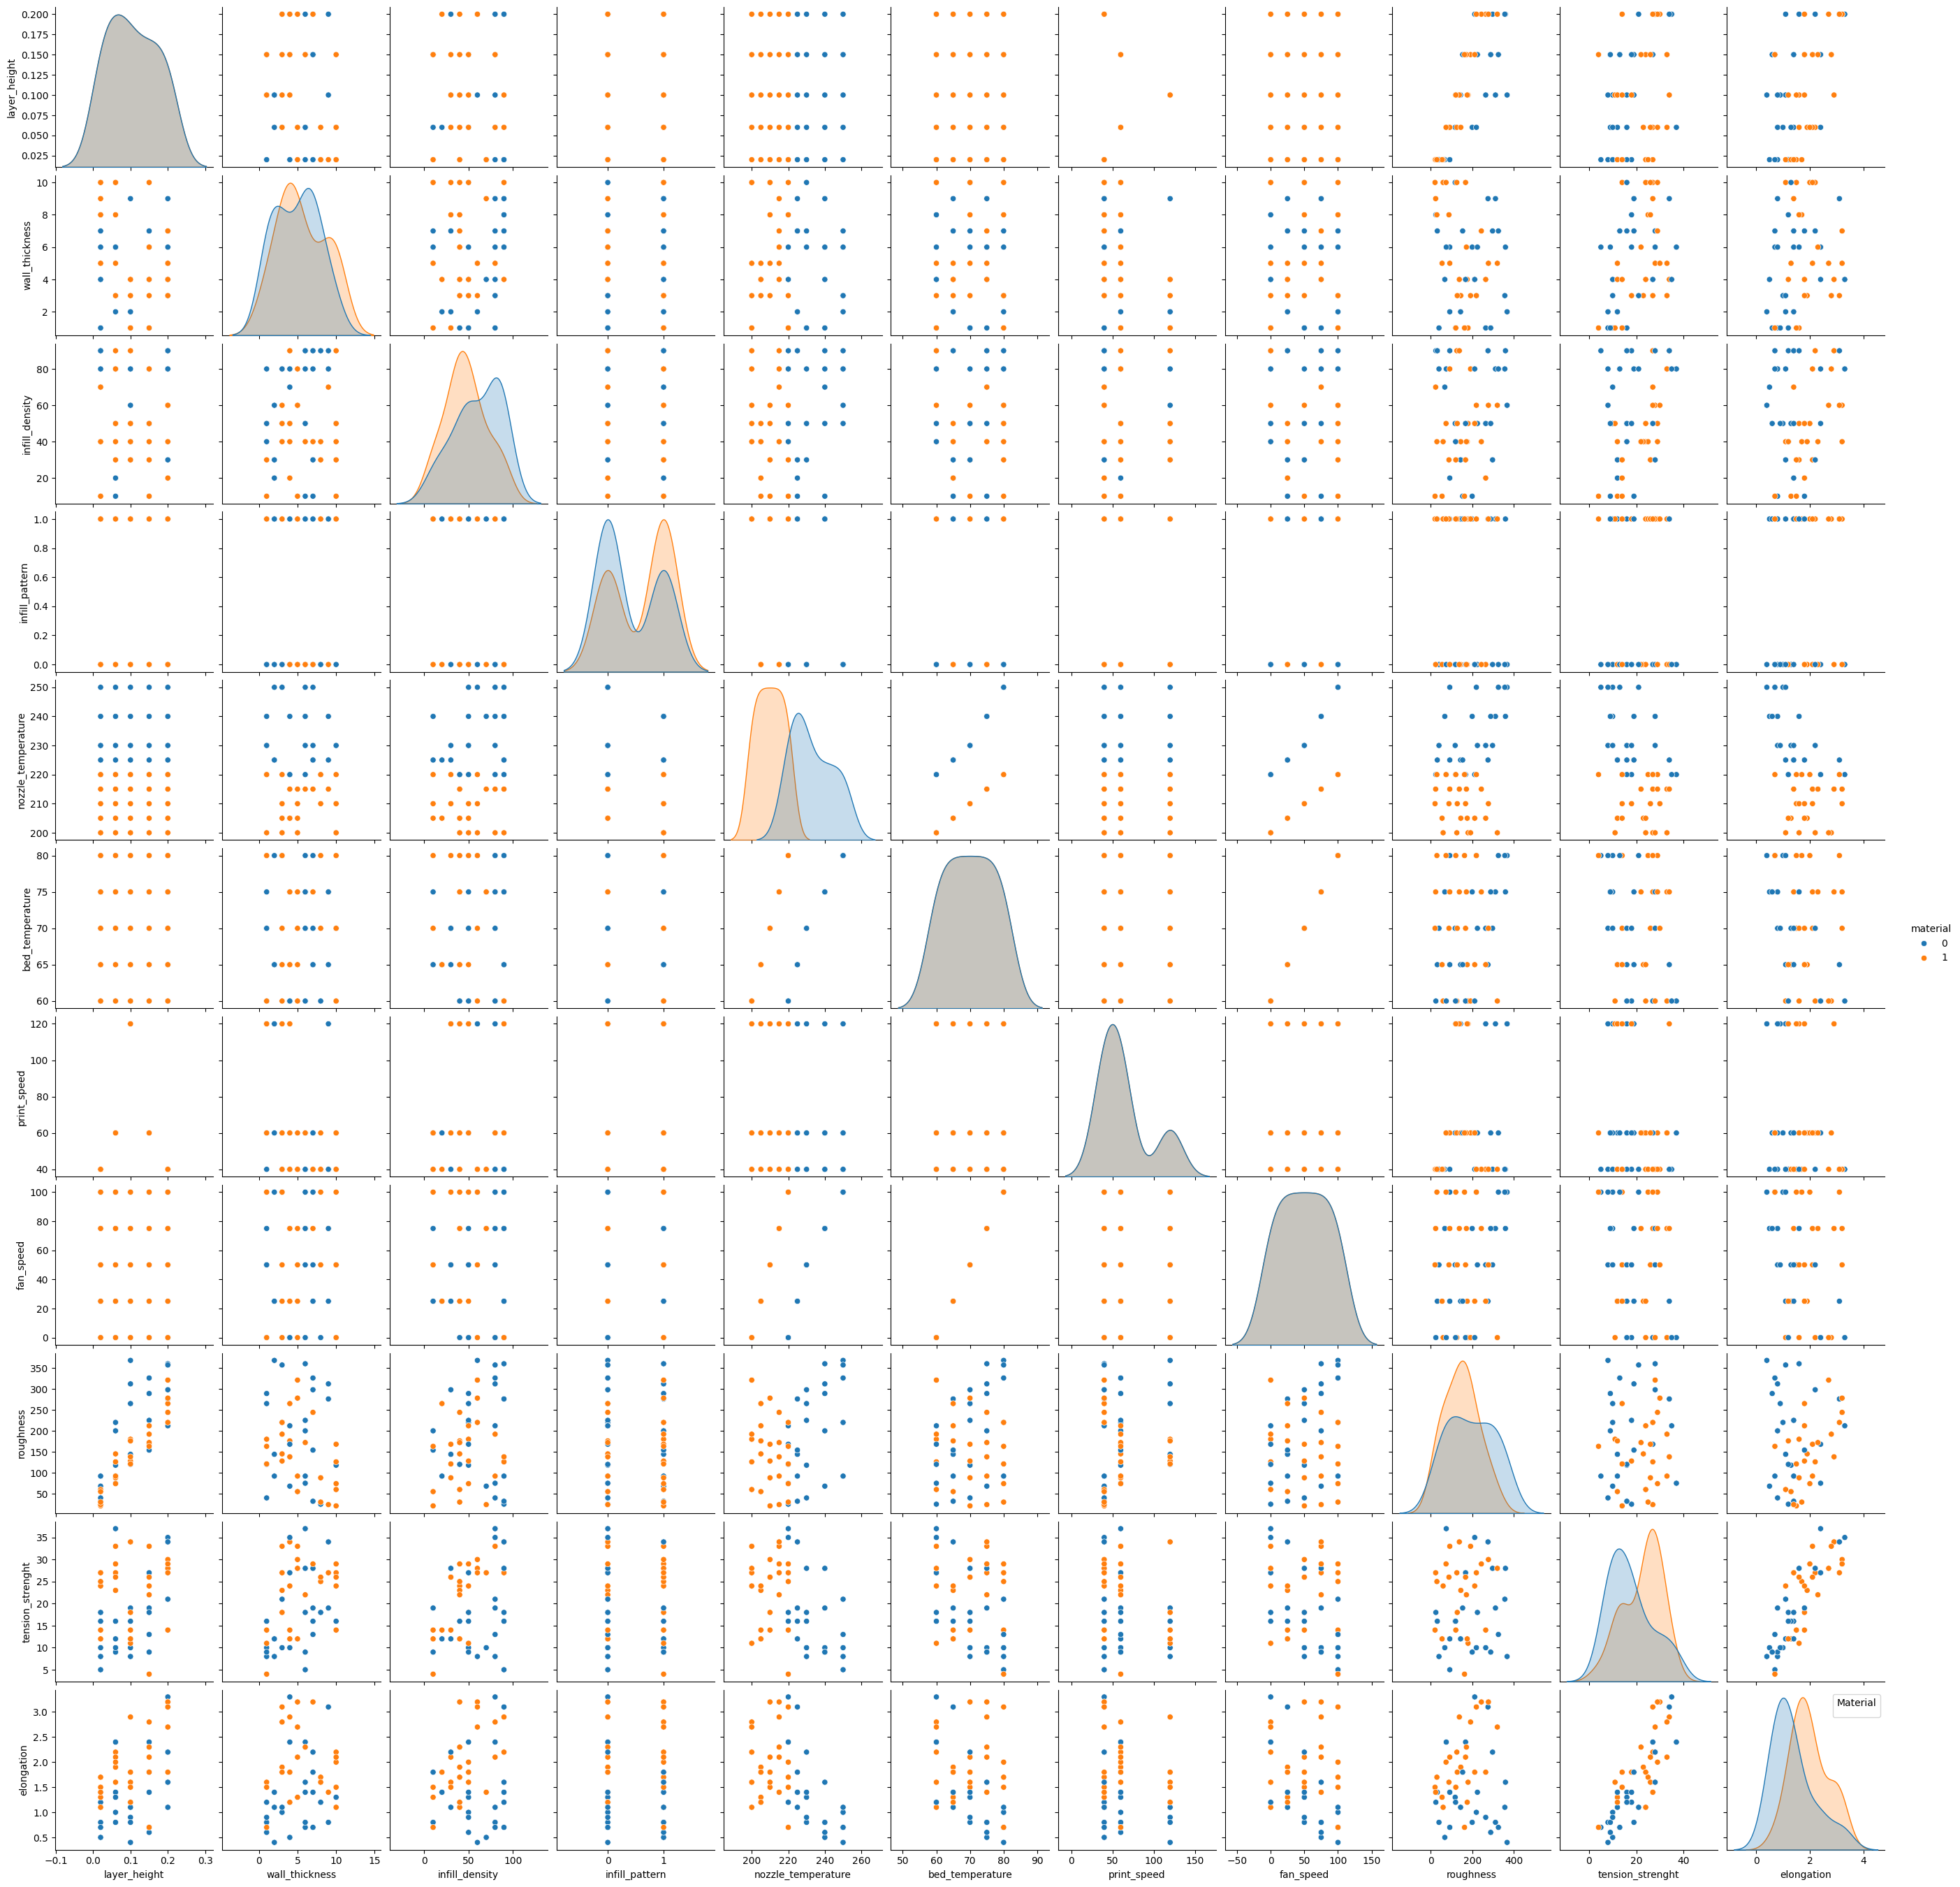

In [23]:
pairplot = sns.pairplot(df, hue='material')
plt.legend(title='Material', loc='upper right')  # Customize the legend
plt.show()

Specific Observations:

layer_height and infill_density: There might be some separation between PLA and ABS, indicating that these materials might behave differently based on these parameters.

nozzle_temperature and bed_temperature: If you observe different clusters for PLA and ABS, it suggests that these materials require different temperature settings during the printing process.

print_speed and fan_speed: If the scatter plots show distinct groups for PLA and ABS, it could indicate that these materials perform differently at various speeds.

Mechanical Properties (roughness, tension_strength, elongation):These plots can reveal how the material properties vary with printing parameters. For instance, if PLA and ABS form distinct clusters, it suggests different mechanical properties under the same printing conditions.

### **Splitting the dataset**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Scaling the features**

Features are standardized using StandardScaler to ensure each feature contributes equally to the distance computations in KNN.

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Training the Model**

In [26]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

### **Cross-validation**

In [27]:
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.5        0.75       0.75       0.75       0.5        1.
 1.         0.33333333 0.66666667 1.        ]
Mean cross-validation score: 0.725


### **Predict on the test data**

In [28]:
y_pred = knn.predict(X_test)

### **Evaluate the model**

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy Score: {acc_score}")

Confusion Matrix:
[[5 1]
 [1 8]]
Accuracy Score: 0.8666666666666667


### **Plotting the confusion matrix**

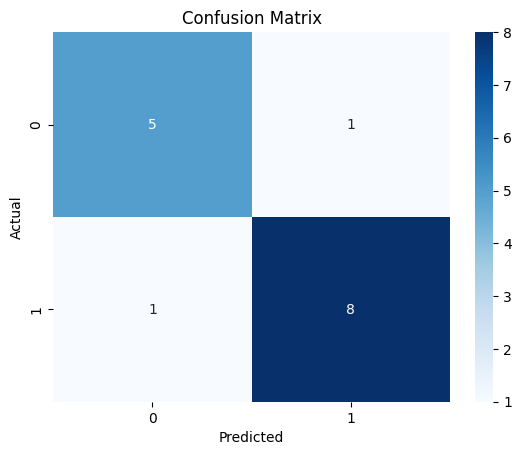

In [30]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Accuracy vs. Number of Neighbors (k)**

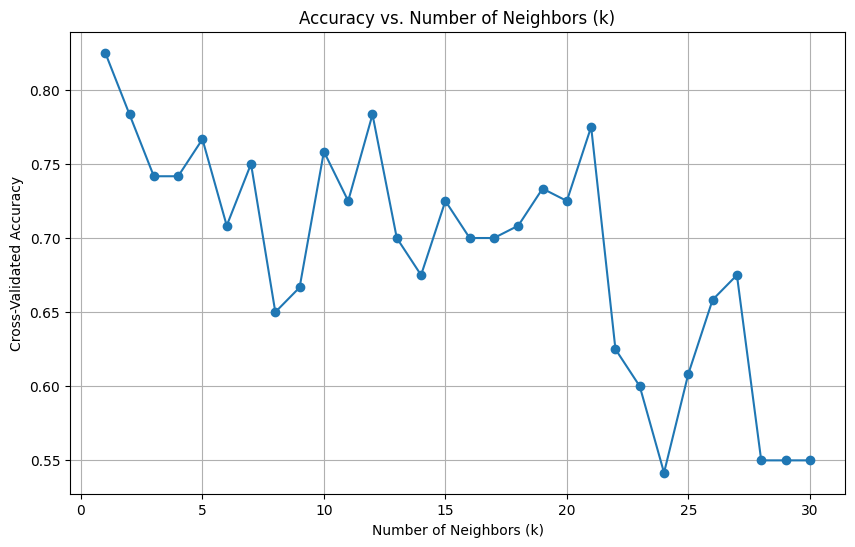

In [33]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

Balance between Bias and Variance:

Bias: With k=15, the model considers the 15 nearest neighbors to make a prediction. This helps in reducing the model's variance (overfitting) as the prediction is averaged over more data points.

Variance: The model avoids overfitting to the training data as it does not rely on a very small number of neighbors which might include noise or outliers.

Performance: Although the cross-validated accuracy for k=15 is not the peak (which seems to occur around k=5), it is still within a competitive range. The choice of k=15 shows good generalization capability as it avoids drastic drops in accuracy seen with higher k values (e.g., k>20).

Why k=15 is a Good Choice:

    Avoids Overfitting: Smaller k values, like k=1, have higher variance and are prone to overfitting. Using k=15 mitigates this risk.
    
    Stable Performance: The graph indicates that the accuracy is relatively stable around k=15. This implies that the model’s performance is not significantly sensitive to the exact value of k in this range.
    
    Simplicity and Consistency: Choosing k=15 provides a balance between simplicity (not too many neighbors to consider) and consistency (avoiding large variations in predictions).